<a href="https://colab.research.google.com/github/abhiwalia33/Laptop-Price-Prediction-ML-Project/blob/main/Machine_learning_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

This project shows a Laptop price prediction system by using the supervised machine learning technique. The research uses random decision forest as the machine learning prediction method which offered 88.7% prediction precision.

Using random decision forest, there are multiple independent variables but one and only one dependent variable whose actual and predicted values are compared to find precision of results.

This project proposes a system where price is dependent variable which is predicted, and this price is derived from factors like Laptop’s model, RAM, ROM (HDD/SSD), GPU, CPU, IPS Display, and Touch Screen.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
df = pd.read_csv("/content/laptop.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

# DATA CLEANING
So we can see that there is column named "Unnamed: 0.1", which is a unnecessary data for this project. So we can safely drop the column from the dataset.

In [ ]:
# using drop function
df = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# checking if our dataset contain null values or not
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
null_raws = df[df.isnull().all(axis=1)]
print(null_raws)

     Company TypeName Inches ScreenResolution  Cpu  Ram Memory  Gpu OpSys  \
20       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
46       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
50       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
115      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
125      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
148      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
190      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
209      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
267      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
336      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
350      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
478      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   

In [ ]:
# now that we know the number of raws which are null i have decided to drop them as it does not contain any information which will be useful for later
df.dropna(axis=0,how='all',inplace = True)

In [ ]:
# checking again for missing values
df.isnull().sum()


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
print(df.duplicated().sum())
print(df.shape)

29
(1273, 11)


In [ ]:
df = df.drop_duplicates()
df.shape

(1244, 11)

In [ ]:
# checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


In [ ]:
#checking statistical data
df.describe()

,Price
count,1244.000000
mean,60606.224427
std,37424.636161
min,9270.720000
25%,32655.445200
50%,52693.920000
75%,79813.440000
max,324954.720000


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23', '?',
       '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3', '1.68',
       '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14', '1.36',
       '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28', '2.33',
       '1.45', '2.79', '8.23', '1.26', '1.84', '0.0002', '2.6', '2.26',
       '3.25', '1.59', '1.13', '1.42', '1.78', '1.10', '1.15', '1.27',


In [ ]:
import numpy as np

# Replace '?' with NaN
df['Weight'] = df['Weight'].replace('?', np.nan)


In [ ]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1243 non-null   float32
 10  Price             1244 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 106.9+ KB


In [ ]:
#seperating categorical & numerical values

categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(exclude=["object"]).columns

In [ ]:
categorical_columns


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Memory',
       'Gpu', 'OpSys'],
      dtype='object')

In [ ]:
numerical_columns # only price is a numerical column in our dataset

Index(['Ram', 'Weight', 'Price'], dtype='object')

while observing the dataset i noticed we can remove 'GB' from RAM column and 'kg' from weight therefore we will have numerical columns which will be useful for further analysis

Exploratry Data Analysis

Price distribution Plot

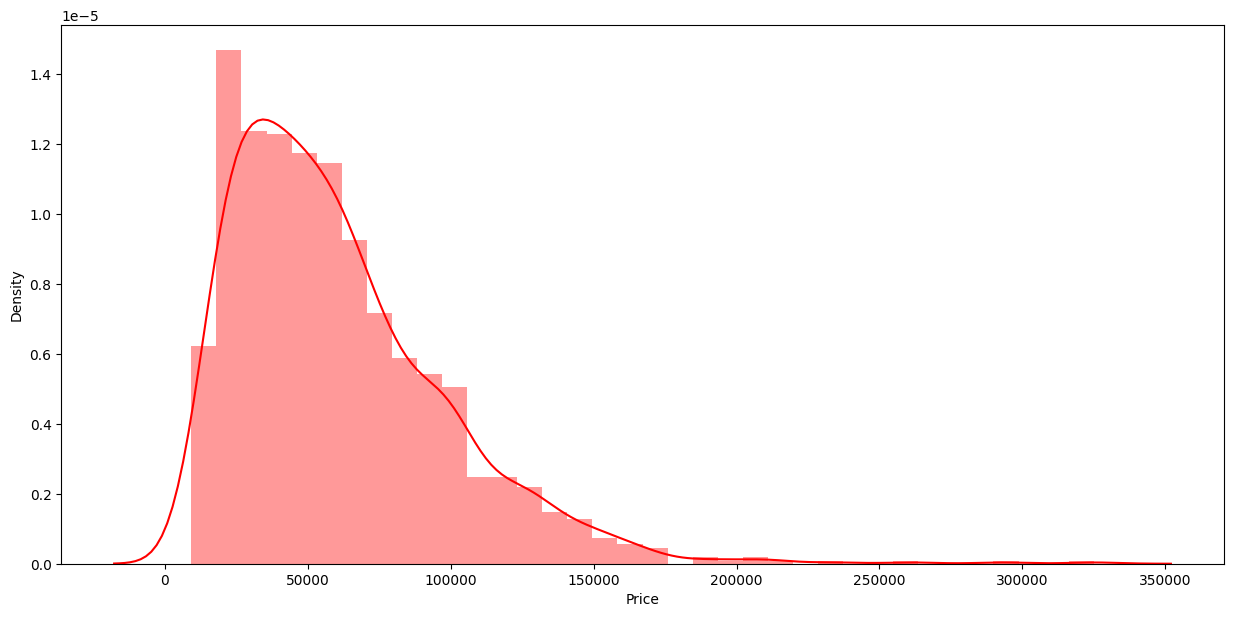

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df['Price'],color = 'red')
plt.show()

Countplot for Categorical columns

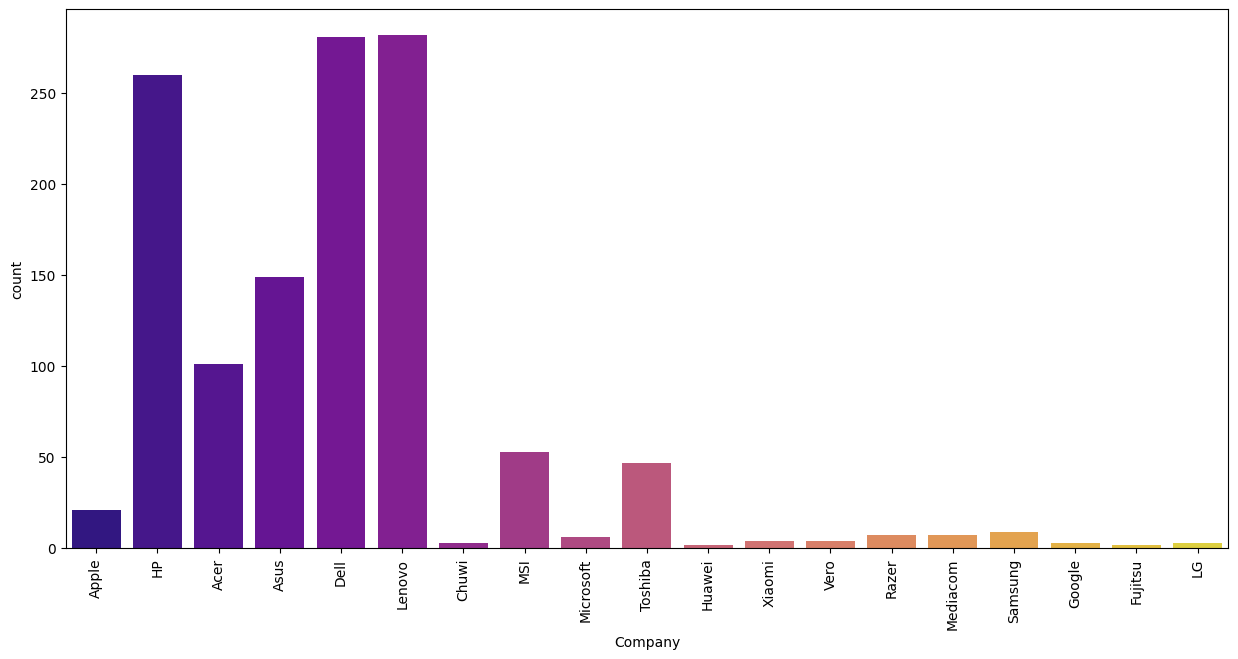

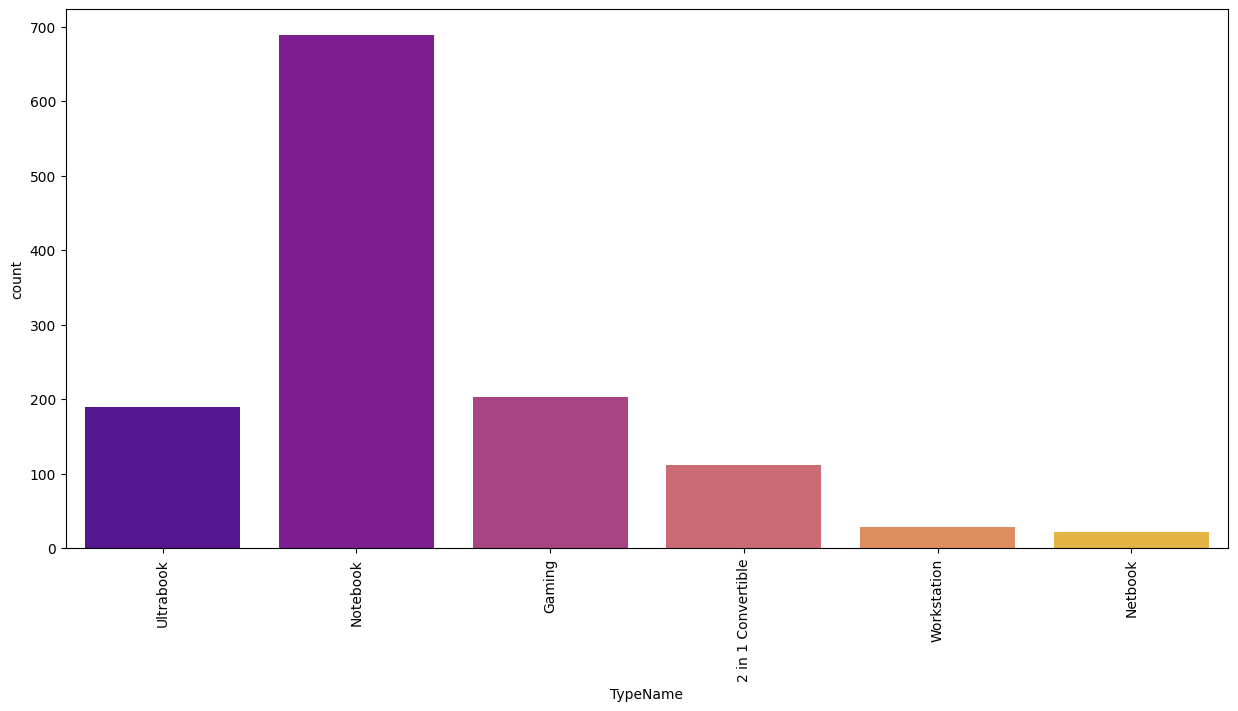

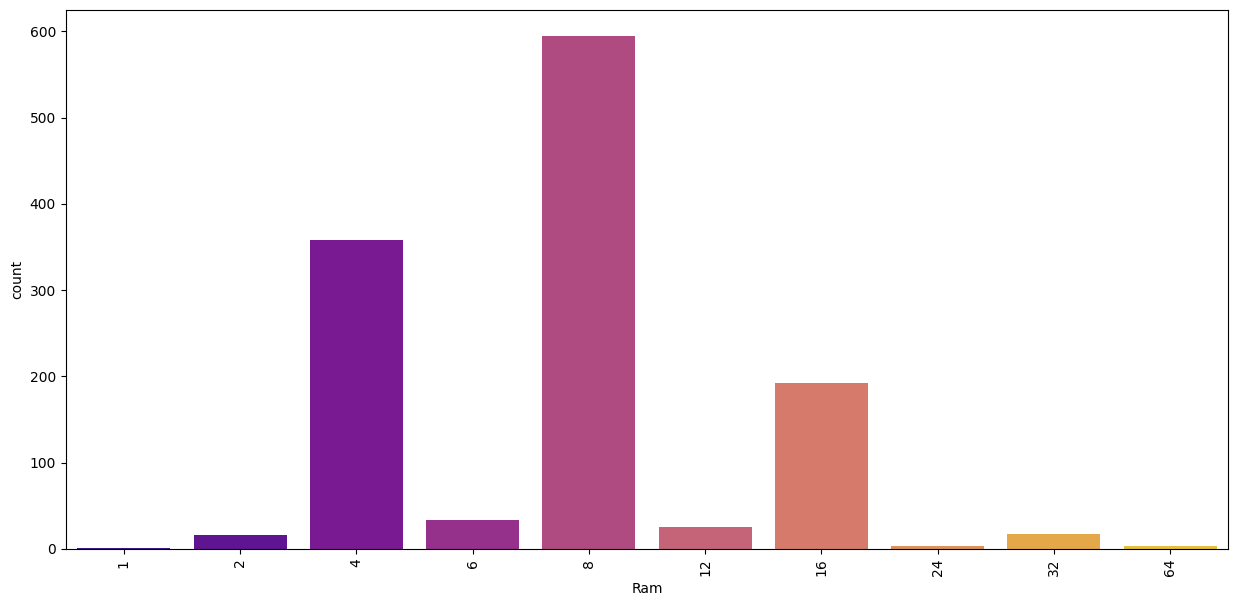

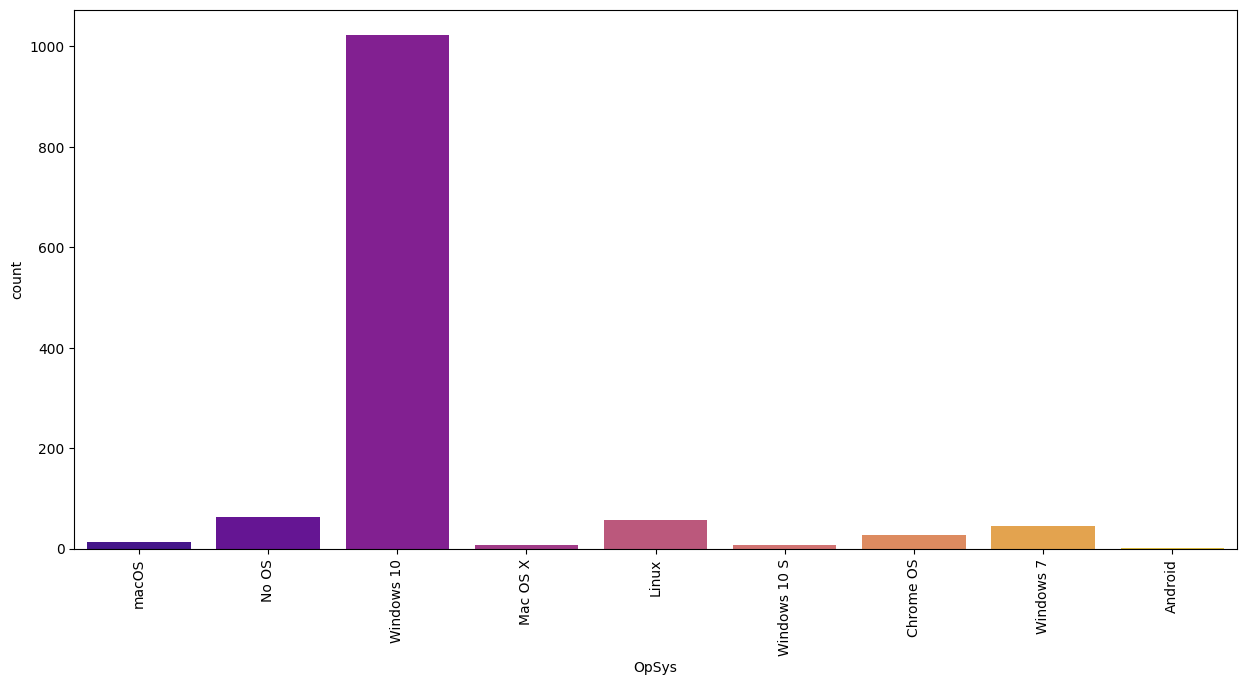

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawplot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(x=df[col], palette='plasma')  # Specify x=df[col]
    plt.xticks(rotation='vertical')
    plt.xlabel(col)  # Add x-axis label

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)


In [ ]:
# highest market share is of dell,Lenovo,HP
# for the type category notebooks are most sold category
# 8 gb ram is mostly picked by the user
# windows OS is mostly used OS system

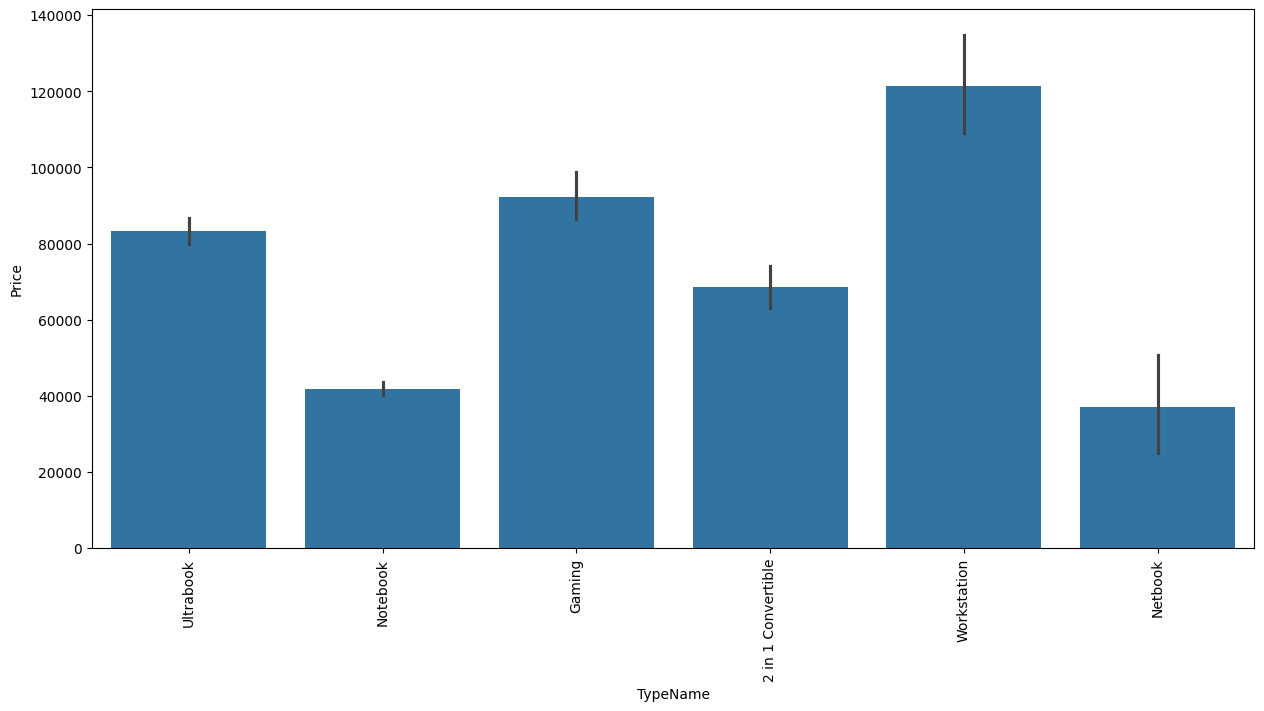

In [ ]:
#bar-plot for typename & price
plt.figure(figsize=(15,7))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

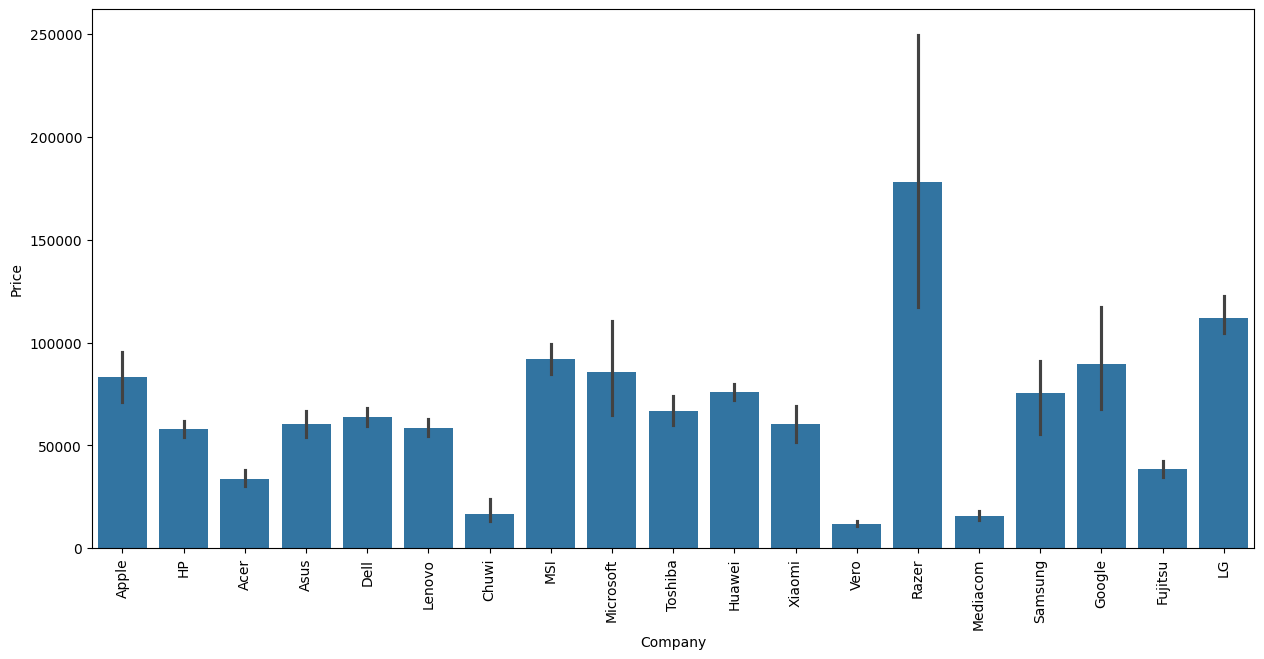

In [ ]:
# Barplot for - "Average price of each laptop brand"
plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880x1800            

In [ ]:
# creating new column - Touchscreen
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
889,Lenovo,Notebook,17.3,1600x900,AMD A4-Series 7210 2.2GHz,4,500GB HDD,AMD Radeon R3,Windows 10,2.80,20193.12,0
146,HP,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305.92,1
28,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,69157.44,0
697,Asus,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,35644.32,1
981,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.20,63669.60,0


In this column '0' represents not a touch screen latop and '1' represents its a touch screen laptop

In [ ]:
# creating new column IPS
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.2000,0,0
1244,HP,Notebook,14,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,58607.4672,0,0
387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8,500GB HDD,AMD FirePro W5130M,Windows 10,2.23,72940.3200,0,0
123,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,67718.8800,0,0
1169,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,44701.9200,0,1


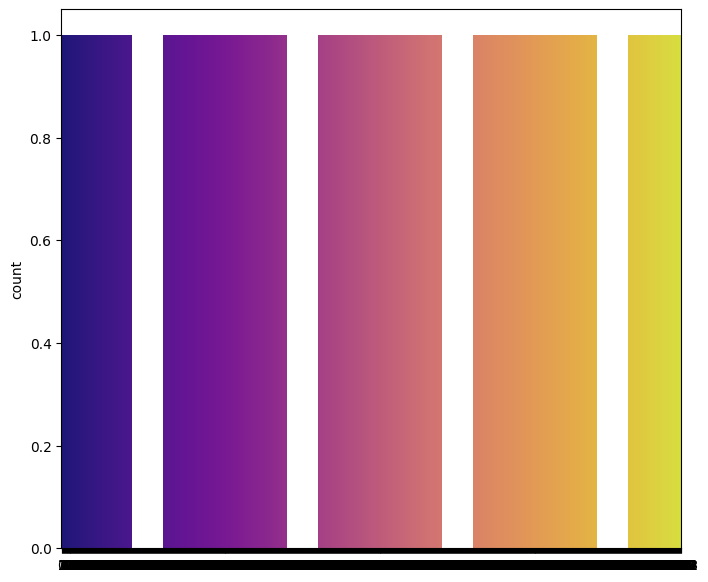

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df['IPS'],palette='plasma')
plt.show()

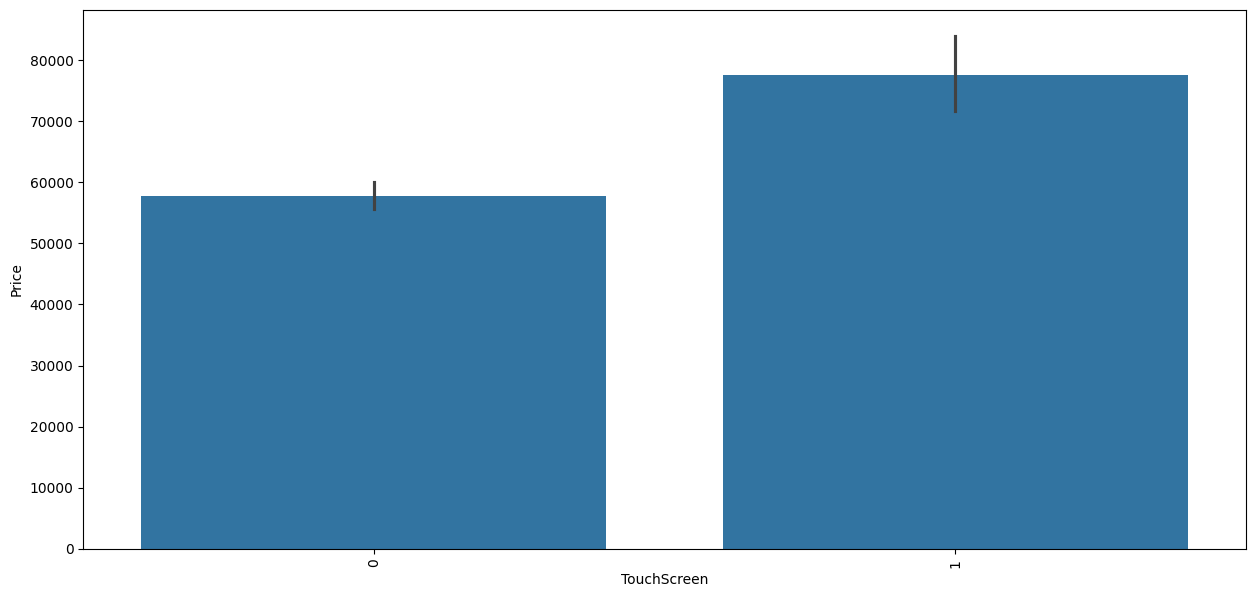

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1243 non-null   float32
 10  Price             1244 non-null   float64
 11  TouchScreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(2), object(8)
memory usage: 126.3+ KB


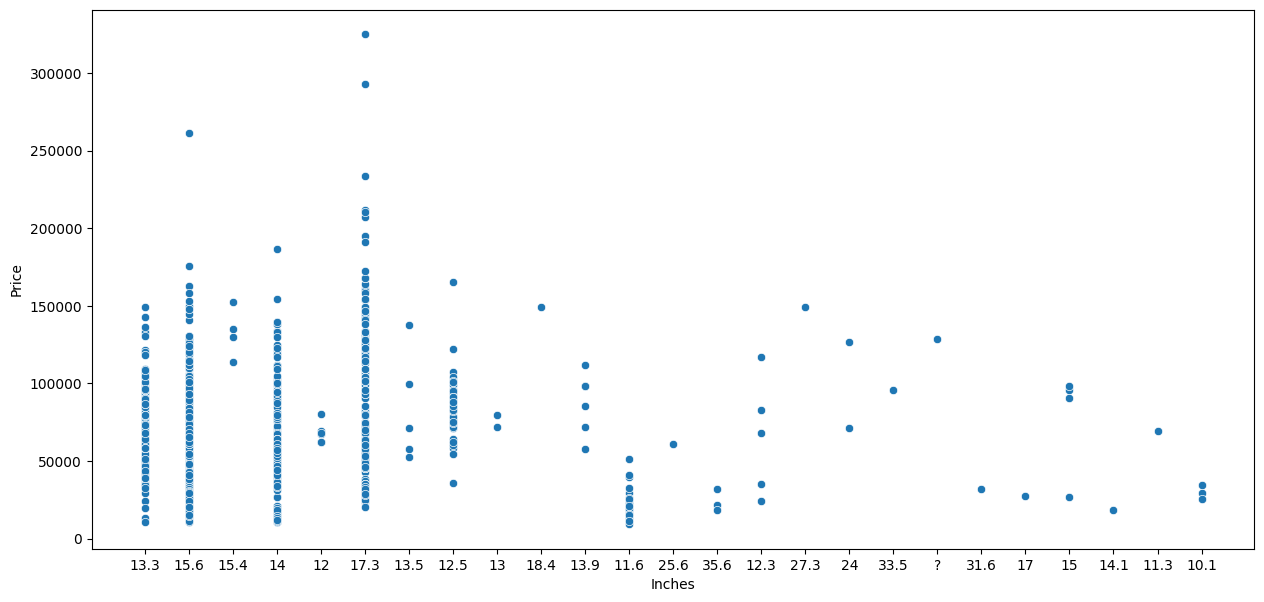

In [ ]:
# relationship b/w size of laptops & price
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.show()

In [ ]:
# splitting screen -resoultion into two columns seperately
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
370,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,58554.72,1,0,Full HD / Touchscreen 1920,1080
878,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18,48618.00,0,0,Full HD 1920,1080
940,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75,74538.72,0,1,IPS Panel Full HD 1920,1080
295,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,69210.72,0,1,IPS Panel Full HD 1920,1080
33,Dell,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,99580.32,1,0,Touchscreen / Quad HD+ 3200,1800


In [ ]:
dfc.head()

NameError: name 'dfc' is not defined

In [ ]:
df['X_res'] = df['X_res'].astype('int64')
import re

# Extract numeric values using regular expressions
df['X_res_numeric'] = df['X_res'].str.extract(r'(\d+)')

# Convert extracted numeric values to integers
df['X_res_numeric'] = df['X_res_numeric'].astype('int64')


ValueError: invalid literal for int() with base 10: 'IPS Panel Retina Display 2560'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1243 non-null   float32
 10  Price             1244 non-null   float64
 11  TouchScreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  X_res             1244 non-null   object 
 14  Y_res             1244 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(2), object(10)
memory usage: 145.8+ KB


In [ ]:
df.corr()['Price']

Ram            0.681922
Weight         0.176362
Price          1.000000
TouchScreen    0.186393
IPS            0.252956
Name: Price, dtype: float64

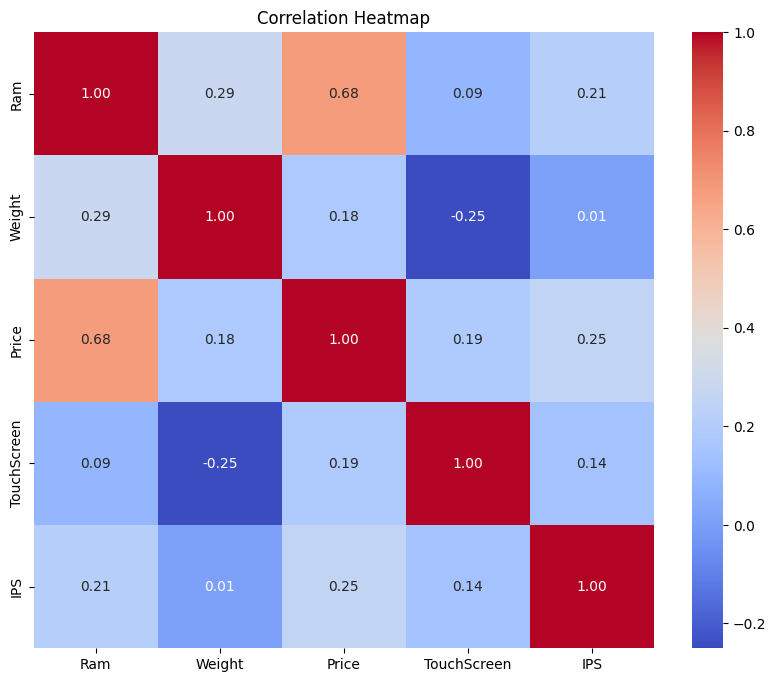

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd

df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

# Calculate PPI
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [ ]:
# inches was showing object datatype and throwing changed its datatype and created new column PPI
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
df.info()

PPI(pixel per inch) is a useful feature which indicates higher resolutions which is often liked by the user and linked with higher prices

In [ ]:
df['ppi'].unique()

In [ ]:
# imputing missing values due to which ppi column was not showing

nan_rows = df[df['ppi'].isnull()]
nan_rows_inch = df[df['Inches'].isnull()]
nan_rows_weight = df[df['Weight'].isnull()]

KeyError: 'ppi'

In [ ]:
mean_inch = df['Inches'].mean()
mean_weight = df['Weight'].mean()

# Replace null values with the mean
df['Inches'].fillna(mean_inch, inplace=True)
df['Weight'].fillna(mean_weight, inplace=True)

In [ ]:
# inspecting missing value due to which ppi is not showing in correlation
print(nan_rows[['X_res', 'Y_res', 'Inches']])

In [ ]:
mean_ppi = df['ppi'].mean()
df['ppi'].fillna(mean_ppi,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
# Recalculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with PPI')
plt.show()

In [ ]:
# since PPI is the combination of inches ,X_res,Y_res we can drop these column
#feature selection

df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

In [ ]:
#CPU analysis
df['Cpu'].value_counts()

mainly we have intel processors only so we can combine them to single category and then rest into not intel and AMD processors

In [ ]:
df['Cpu name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu name'].apply(fetch_processor)
df.head(20)

KeyError: 'Cpu name'

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

KeyError: 'Cpu brand'

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

KeyError: 'Cpu brand'

In [ ]:
df.drop(columns=['Cpu','Cpu name'],inplace=True)
df.head()

KeyError: "['Cpu name'] not found in axis"

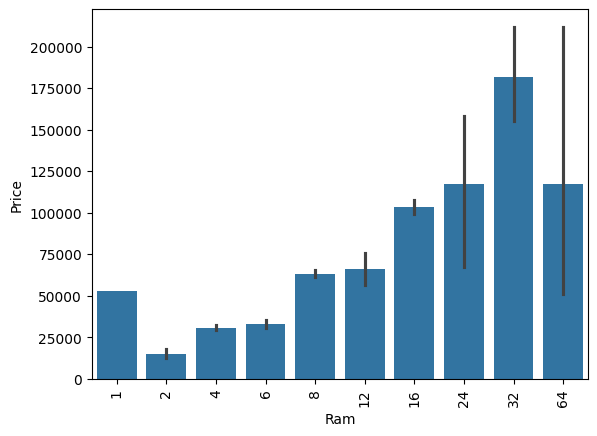

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
